In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import matplotlib.cm as cm
import plotly.graph_objects as go
!pip install pycountry
%matplotlib inline

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel('C:/Users/asmit/OneDrive/Desktop/python 1/BA_scrape.xlsx')

In [4]:
df

,Unnamed: 0,Title,Name,Country,Passenger Verification,Recommendation,Rating,Date,Review
0,512,"""onboard charity collection is inappropriate""",Anders Pedersen,Vietnam,Trip Verified,yes,6.0,29th December 2019,Budapest to Billund return via London on 18 an...
1,0,"""cancel your flight without notice""",B Sherry,United States,Not Verified,no,1.0,23rd May 2023,Top Ten REASONS to not use British Airways To...
2,5,"""BA is on the skids downhill""",N Mayle,United States,Trip Verified,no,2.0,19th May 2023,Words fail to describe this last awful flight ...
3,6,"""Absolutely terrible experience""",E Heale,United States,Trip Verified,no,1.0,17th May 2023,Absolutely terrible experience. The app would ...
4,9,"""Another bad show""",Kathi Blanning,United States,Not Verified,no,3.0,14th May 2023,Only the second time flying BA as first time ...
...,...,...,...,...,...,...,...,...,...
3395,1160,"""a flight with no problems""",Ignacio Carmona,Argentina,Trip Verified,yes,7.0,31st January 2018,Johannesburg to Cape Town. A really basic flig...
3396,1941,"""excellent cabin crew""",C Jordan,Argentina,NaN,yes,8.0,27th September 2016,London Gatwick to New York JFK with British Ai...
3397,2846,British Airways customer review,Jordan Charles,Argentina,NaN,yes,7.0,12th May 2015,LHR-EZE business class on board B777. Tired ol...
3398,2909,British Airways customer review,S Stevenson,NaN,NaN,no,2.0,8th April 2015,I travelled from London to Jo'burg and back on...


# DATA CLEANING

In [5]:
df=df.drop("Unnamed: 0",axis=1)
df

,Title,Name,Country,Passenger Verification,Recommendation,Rating,Date,Review
0,"""onboard charity collection is inappropriate""",Anders Pedersen,Vietnam,Trip Verified,yes,6.0,29th December 2019,Budapest to Billund return via London on 18 an...
1,"""cancel your flight without notice""",B Sherry,United States,Not Verified,no,1.0,23rd May 2023,Top Ten REASONS to not use British Airways To...
2,"""BA is on the skids downhill""",N Mayle,United States,Trip Verified,no,2.0,19th May 2023,Words fail to describe this last awful flight ...
3,"""Absolutely terrible experience""",E Heale,United States,Trip Verified,no,1.0,17th May 2023,Absolutely terrible experience. The app would ...
4,"""Another bad show""",Kathi Blanning,United States,Not Verified,no,3.0,14th May 2023,Only the second time flying BA as first time ...
...,...,...,...,...,...,...,...,...
3395,"""a flight with no problems""",Ignacio Carmona,Argentina,Trip Verified,yes,7.0,31st January 2018,Johannesburg to Cape Town. A really basic flig...
3396,"""excellent cabin crew""",C Jordan,Argentina,NaN,yes,8.0,27th September 2016,London Gatwick to New York JFK with British Ai...
3397,British Airways customer review,Jordan Charles,Argentina,NaN,yes,7.0,12th May 2015,LHR-EZE business class on board B777. Tired ol...
3398,British Airways customer review,S Stevenson,NaN,NaN,no,2.0,8th April 2015,I travelled from London to Jo'burg and back on...


In [6]:
df.shape

(3400, 8)

In [7]:
df.describe()

,Rating
count,3395.000000
mean,4.754050
std,3.164682
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,10.000000


In [8]:
nan_values=df.isna()
nan_columns=nan_values.any()
nan_columns

Title                     False
Name                      False
Country                    True
Passenger Verification     True
Recommendation            False
Rating                     True
Date                      False
Review                    False
dtype: bool

In [9]:
df['Country'] =  df['Country'].fillna('Unknown')

In [10]:
df['Passenger Verification'] =  df['Passenger Verification'].fillna('Unknown')

In [11]:
nan_values=df.isna()
nan_columns=nan_values.any()
nan_columns

Title                     False
Name                      False
Country                   False
Passenger Verification    False
Recommendation            False
Rating                     True
Date                      False
Review                    False
dtype: bool

In [12]:
df['Rating'].isna().sum()

5

In [13]:
df

,Title,Name,Country,Passenger Verification,Recommendation,Rating,Date,Review
0,"""onboard charity collection is inappropriate""",Anders Pedersen,Vietnam,Trip Verified,yes,6.0,29th December 2019,Budapest to Billund return via London on 18 an...
1,"""cancel your flight without notice""",B Sherry,United States,Not Verified,no,1.0,23rd May 2023,Top Ten REASONS to not use British Airways To...
2,"""BA is on the skids downhill""",N Mayle,United States,Trip Verified,no,2.0,19th May 2023,Words fail to describe this last awful flight ...
3,"""Absolutely terrible experience""",E Heale,United States,Trip Verified,no,1.0,17th May 2023,Absolutely terrible experience. The app would ...
4,"""Another bad show""",Kathi Blanning,United States,Not Verified,no,3.0,14th May 2023,Only the second time flying BA as first time ...
...,...,...,...,...,...,...,...,...
3395,"""a flight with no problems""",Ignacio Carmona,Argentina,Trip Verified,yes,7.0,31st January 2018,Johannesburg to Cape Town. A really basic flig...
3396,"""excellent cabin crew""",C Jordan,Argentina,Unknown,yes,8.0,27th September 2016,London Gatwick to New York JFK with British Ai...
3397,British Airways customer review,Jordan Charles,Argentina,Unknown,yes,7.0,12th May 2015,LHR-EZE business class on board B777. Tired ol...
3398,British Airways customer review,S Stevenson,Unknown,Unknown,no,2.0,8th April 2015,I travelled from London to Jo'burg and back on...


In [14]:
df=df.dropna(subset=['Rating'])

In [15]:
df['Rating'].isna().sum()

0

In [16]:
df

,Title,Name,Country,Passenger Verification,Recommendation,Rating,Date,Review
0,"""onboard charity collection is inappropriate""",Anders Pedersen,Vietnam,Trip Verified,yes,6.0,29th December 2019,Budapest to Billund return via London on 18 an...
1,"""cancel your flight without notice""",B Sherry,United States,Not Verified,no,1.0,23rd May 2023,Top Ten REASONS to not use British Airways To...
2,"""BA is on the skids downhill""",N Mayle,United States,Trip Verified,no,2.0,19th May 2023,Words fail to describe this last awful flight ...
3,"""Absolutely terrible experience""",E Heale,United States,Trip Verified,no,1.0,17th May 2023,Absolutely terrible experience. The app would ...
4,"""Another bad show""",Kathi Blanning,United States,Not Verified,no,3.0,14th May 2023,Only the second time flying BA as first time ...
...,...,...,...,...,...,...,...,...
3395,"""a flight with no problems""",Ignacio Carmona,Argentina,Trip Verified,yes,7.0,31st January 2018,Johannesburg to Cape Town. A really basic flig...
3396,"""excellent cabin crew""",C Jordan,Argentina,Unknown,yes,8.0,27th September 2016,London Gatwick to New York JFK with British Ai...
3397,British Airways customer review,Jordan Charles,Argentina,Unknown,yes,7.0,12th May 2015,LHR-EZE business class on board B777. Tired ol...
3398,British Airways customer review,S Stevenson,Unknown,Unknown,no,2.0,8th April 2015,I travelled from London to Jo'burg and back on...


In [17]:
nan_values=df.isna()
nan_columns=nan_values.any()
nan_columns

Title                     False
Name                      False
Country                   False
Passenger Verification    False
Recommendation            False
Rating                    False
Date                      False
Review                    False
dtype: bool

In [18]:
df= df.replace('Verified Review','Trip Verified', regex=True)

In [19]:
df= df.replace('Unverified','Not Verified', regex=True)

In [20]:
print(df.dtypes)

Title                      object
Name                       object
Country                    object
Passenger Verification     object
Recommendation             object
Rating                    float64
Date                       object
Review                     object
dtype: object


# EDA

In [21]:
df['Passenger Verification'].value_counts()

Unknown          2156
Trip Verified    1042
Not Verified      197
Name: Passenger Verification, dtype: int64

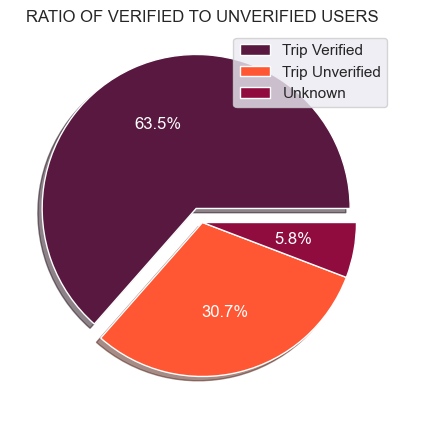

In [81]:
plt.close()

plt.figure(figsize=(10,5))
plt.title('RATIO OF VERIFIED TO UNVERIFIED USERS')
mylabels = ['Trip Verified','Trip Unverified','Unknown']
c = ['#581840','#FF5733','#900C3F']
explode = (0.1, 0, 0)

plt.pie(df['Passenger Verification'].value_counts(),labels=mylabels,colors=c,shadow=True,explode=explode,autopct='%1.1f%%',textprops={'color':"white"})
plt.legend(loc='upper right')
plt.savefig('1.png')

In [23]:
df['Country'].value_counts()

United Kingdom           2142
United States             369
Australia                 142
Canada                    103
Germany                    58
                         ... 
Laos                        1
Panama                      1
Saint Kitts and Nevis       1
Ukraine                     1
Jordan                      1
Name: Country, Length: 69, dtype: int64

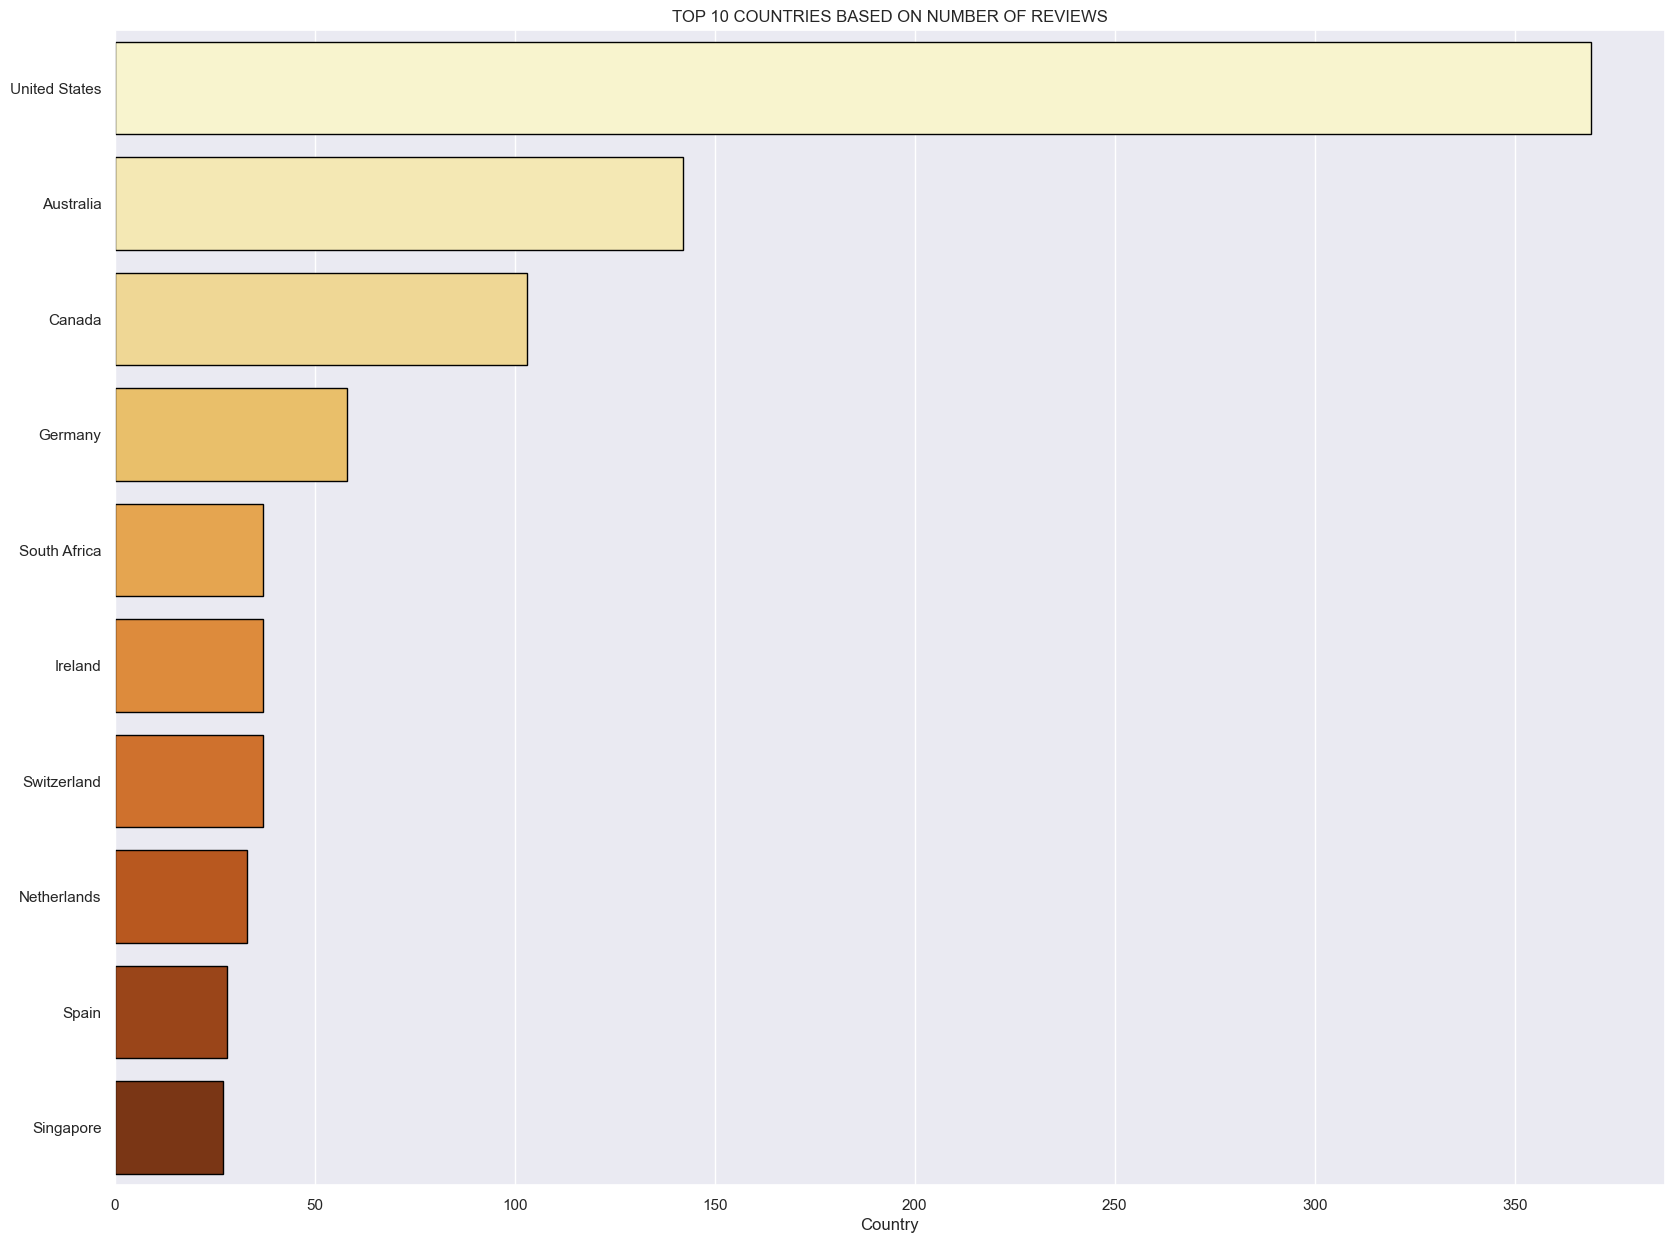

In [82]:
yy=df.Country.value_counts()
yy1=yy.head(11)
del yy1[yy1.index[0]]
plt.figure(figsize=(20,15))
plt.title('TOP 10 COUNTRIES BASED ON NUMBER OF REVIEWS')
sns.barplot(y=yy1.index,x=yy1,palette="YlOrBr", edgecolor='black');
plt.savefig('2.png')

In [25]:
df['Rating'].value_counts()

1.0     775
2.0     389
3.0     387
8.0     346
10.0    295
9.0     293
7.0     291
4.0     234
5.0     212
6.0     173
Name: Rating, dtype: int64

In [26]:
df=df.sort_values(by=['Rating'],ascending=False)
zz=df['Rating'].value_counts()
zz

1.0     775
2.0     389
3.0     387
8.0     346
10.0    295
9.0     293
7.0     291
4.0     234
5.0     212
6.0     173
Name: Rating, dtype: int64

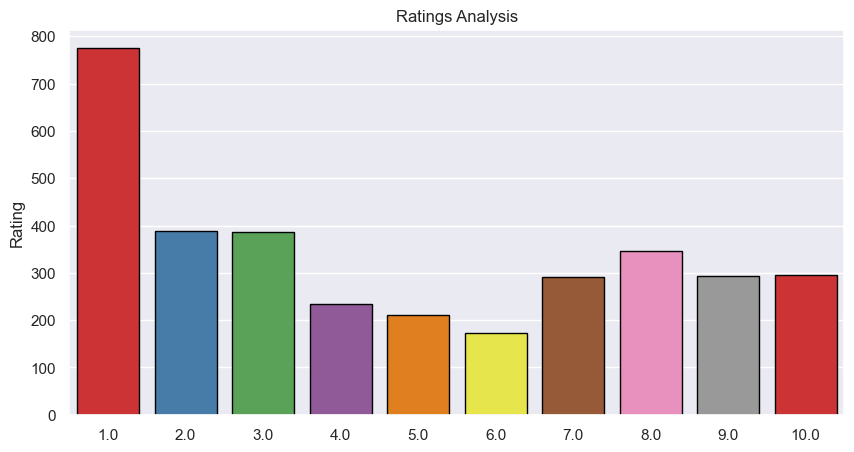

In [83]:
plt.figure(figsize=(10,5))
plt.title('Ratings Analysis')
sns.barplot(x=zz.index,y=zz,palette='Set1', edgecolor='black');
plt.savefig('3.png')

In [28]:
df2 = df[["Rating"]].mean()
df2

Rating    4.75405
dtype: float64

In [29]:
df['Recommendation'].value_counts()

no     2012
yes    1383
Name: Recommendation, dtype: int64

In [30]:
zz1=df['Recommendation'].value_counts()
zz1

no     2012
yes    1383
Name: Recommendation, dtype: int64

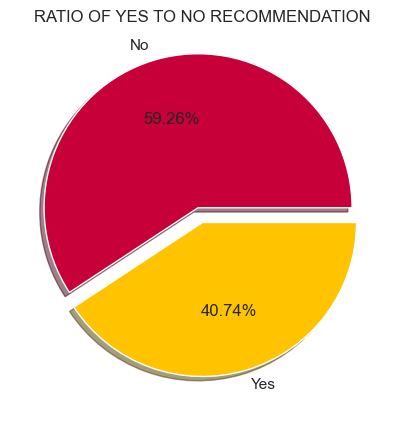

In [84]:

plt.close()
plt.figure(figsize=(10,5))
plt.title('RATIO OF YES TO NO RECOMMENDATION')
mylabels = ['No','Yes']
c = ['#C70039','#FFC300']
explode = (0.1, 0)

plt.pie(df['Recommendation'].value_counts(),labels=mylabels,colors=c,shadow=True,explode=explode,autopct='%.2f%%')
plt.savefig('4.png')

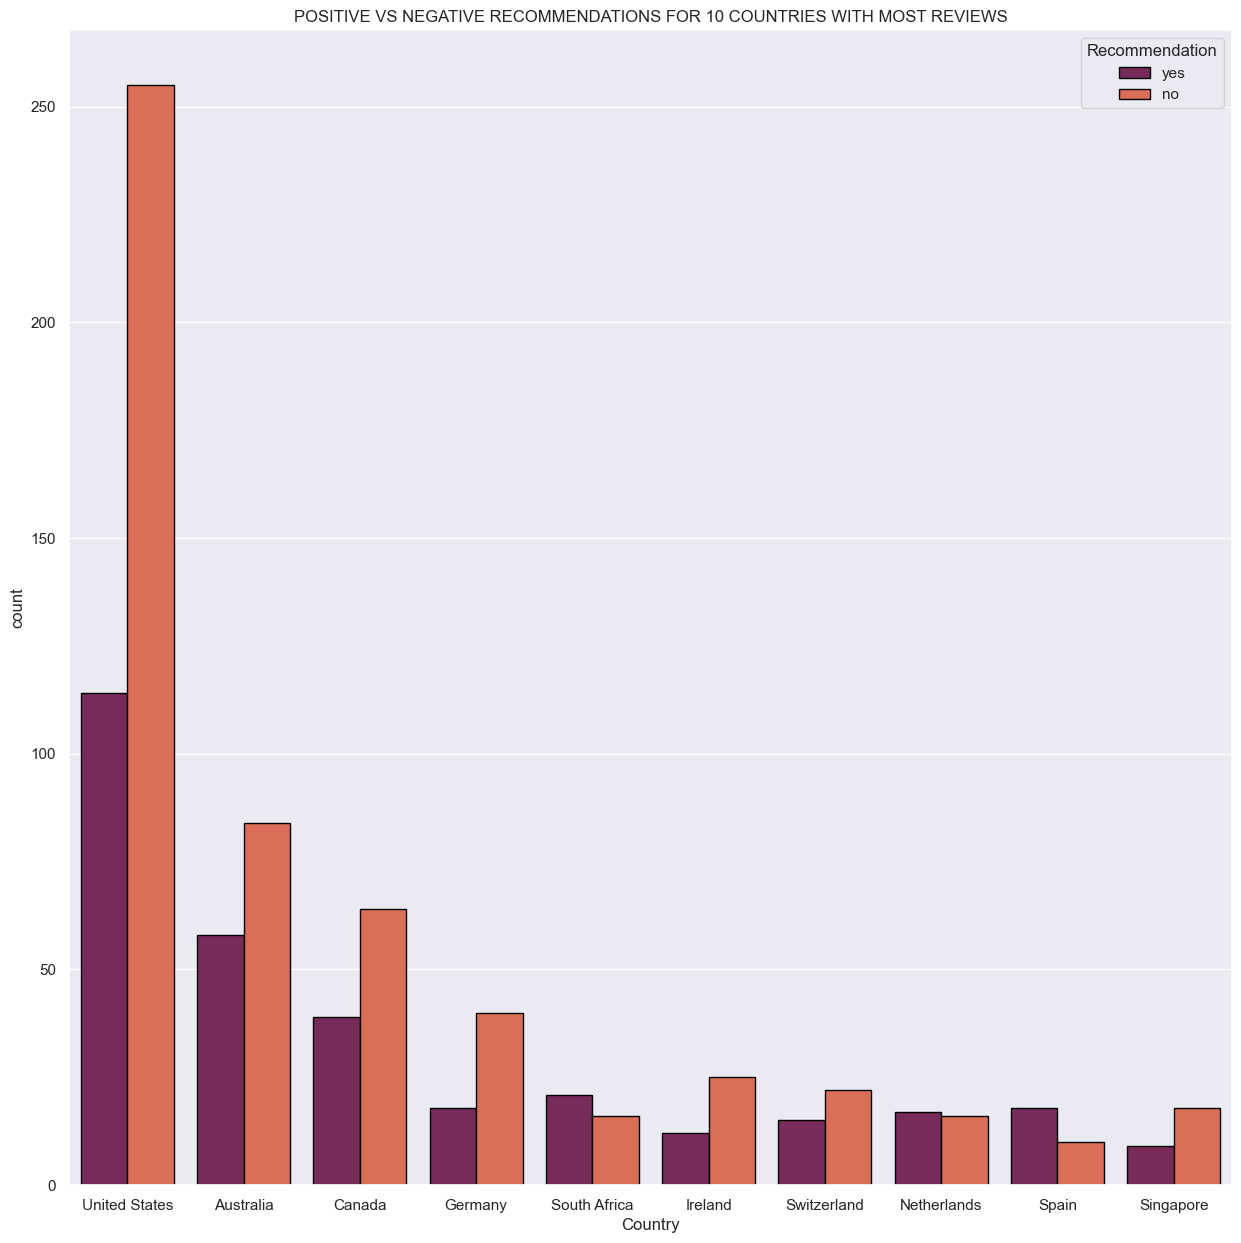

In [85]:
sns.countplot(x='Country',hue='Recommendation',data=df,palette="rocket",order=df.Country.value_counts().iloc[1:11].index,edgecolor='black')
sns.set(rc={'figure.figsize':(15,15)})
plt.title("POSITIVE VS NEGATIVE RECOMMENDATIONS FOR 10 COUNTRIES WITH MOST REVIEWS")
plt.savefig('5.png')

In [398]:
category_counts = df['Country'].value_counts()
top_categories = category_counts.head(12).index.tolist()
filtered_df = df[df['Country'].isin(top_categories)]

In [399]:
recommendation_counts = filtered_df.groupby(['Country', 'Recommendation']).size().unstack()

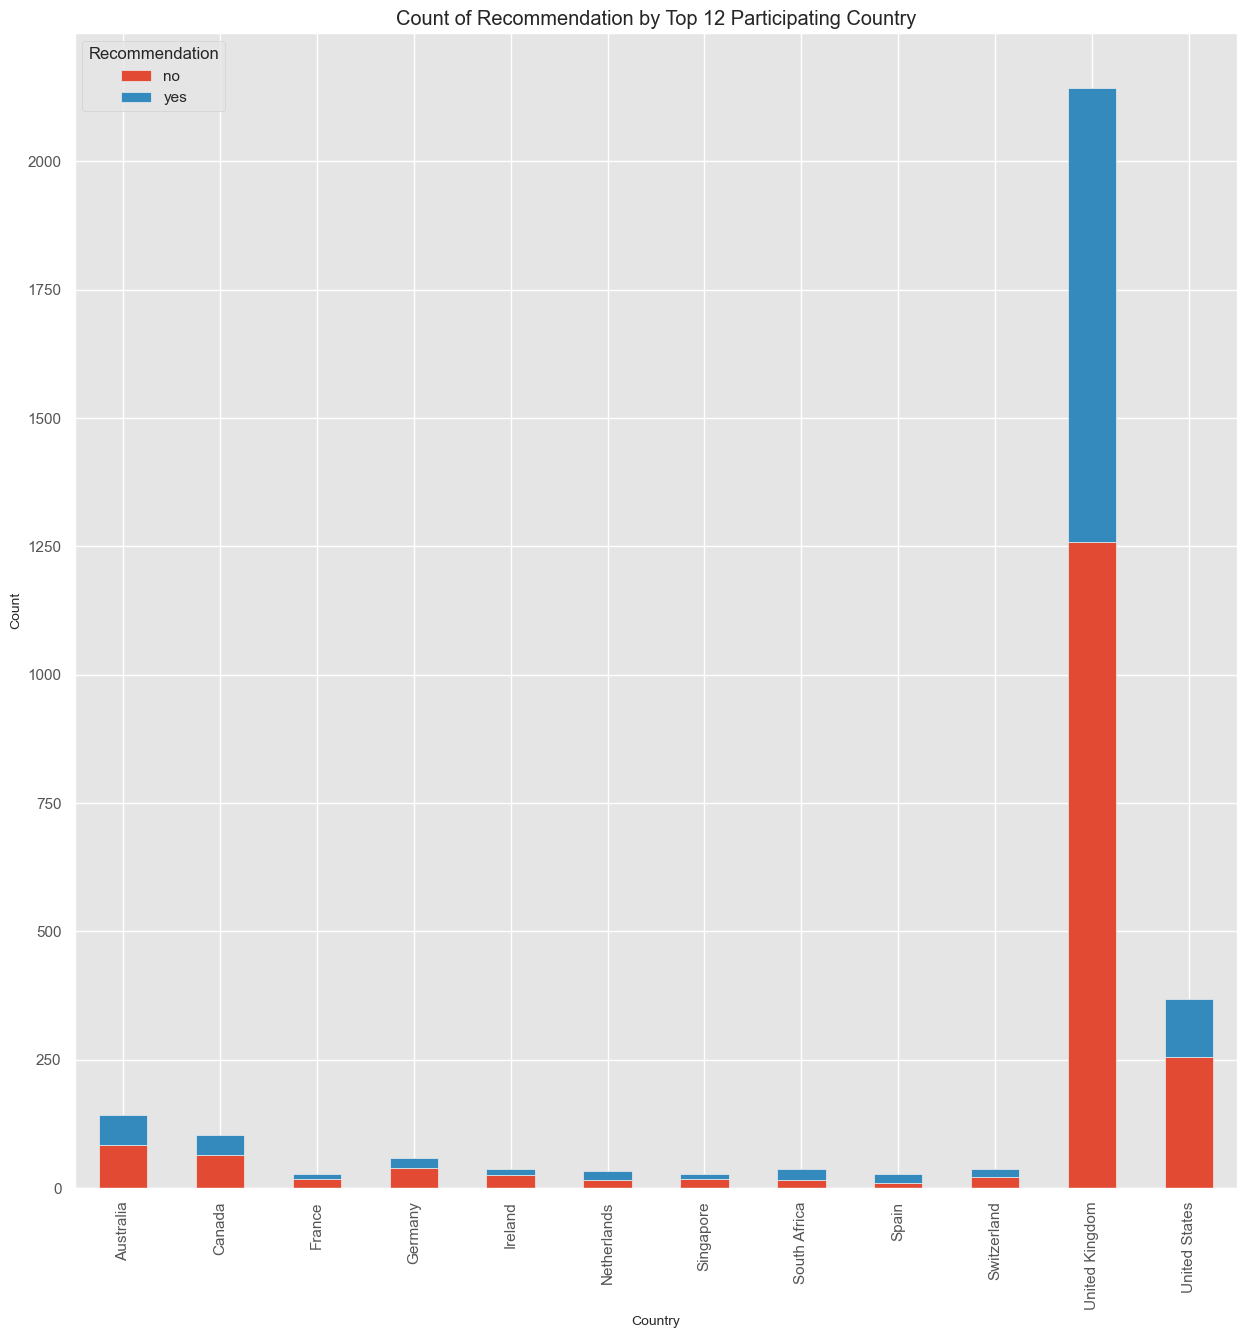

<Figure size 1500x1500 with 0 Axes>

In [401]:
recommendation_counts.plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Recommendation by Top 12 Participating Country')
plt.show()
plt.savefig('13.png')

In [33]:
z=df['Country'].unique()
z

array(['United Kingdom', 'India', 'United States', 'Italy', 'Ireland',
       'Greece', 'Germany', 'Finland', 'Denmark', 'Sweden', 'Qatar',
       'Switzerland', 'Thailand', 'Portugal', 'Poland',
       'United Arab Emirates', 'Saudi Arabia', 'Spain', 'South Africa',
       'Slovakia', 'Malaysia', 'Kuwait', 'Norway', 'Netherlands',
       'Canada', 'Australia', 'Brazil', 'Belgium', 'Austria', 'Chile',
       'China', 'Hong Kong', 'Ghana', 'Israel', 'Mexico', 'Japan',
       'France', 'Egypt', 'Costa Rica', 'Bulgaria', 'Botswana',
       'New Zealand', 'Singapore', 'Romania', 'Argentina', 'South Korea',
       'Jordan', 'Ukraine', 'Luxembourg', 'Philippines', 'Panama',
       'Iceland', 'Taiwan', 'Vietnam', 'Indonesia', 'Russian Federation',
       'Unknown', 'Saint Kitts and Nevis', 'Turkey', 'Trinidad & Tobago',
       'Cyprus', 'Cayman Islands', 'Czech Republic', 'Laos', 'Hungary',
       'Bermuda', 'Dominican Republic', 'Nigeria', 'Bahrain'],
      dtype=object)

In [34]:
df['Country']

1620    United Kingdom
632     United Kingdom
1285    United Kingdom
1450    United Kingdom
2346    United Kingdom
             ...      
2659      South Africa
466     United Kingdom
2663      South Africa
1176    United Kingdom
410     United Kingdom
Name: Country, Length: 3395, dtype: object

In [35]:
y=1
n=1
yesv=[]
nov=[]

In [36]:
for i in range(0,len(z)):
    y=0
    n=0
    c=z[i]
    print(c)
    for j in range(0,len(df)):
        if(df['Country'].iloc[j]==c  and df['Recommendation'].iloc[j]=='yes'):
            y=y+1
        elif(df['Country'].iloc[j]==c  and df['Recommendation'].iloc[j]== 'no'):
            n=n+1
    yesv.append(y)
    nov.append(n)

United Kingdom
India
United States
Italy
Ireland
Greece
Germany
Finland
Denmark
Sweden
Qatar
Switzerland
Thailand
Portugal
Poland
United Arab Emirates
Saudi Arabia
Spain
South Africa
Slovakia
Malaysia
Kuwait
Norway
Netherlands
Canada
Australia
Brazil
Belgium
Austria
Chile
China
Hong Kong
Ghana
Israel
Mexico
Japan
France
Egypt
Costa Rica
Bulgaria
Botswana
New Zealand
Singapore
Romania
Argentina
South Korea
Jordan
Ukraine
Luxembourg
Philippines
Panama
Iceland
Taiwan
Vietnam
Indonesia
Russian Federation
Unknown
Saint Kitts and Nevis
Turkey
Trinidad & Tobago
Cyprus
Cayman Islands
Czech Republic
Laos
Hungary
Bermuda
Dominican Republic
Nigeria
Bahrain


In [37]:
rat=[]


In [38]:
for i in range(0,len(nov)):
    if(nov[i]==0):
        rat.append(yesv[i])
    else:
        rat.append(yesv[i]/nov[i])

In [39]:
dict = {'Country_Name': z, 'Yes': yesv, 'No': nov,'Ratio':rat}

In [40]:
df1 = pd.DataFrame(dict)

In [41]:
df1.sort_values(by=['Ratio'])

,Country_Name,Yes,No,Ratio
68,Bahrain,0,1,0.0
59,Trinidad & Tobago,0,2,0.0
60,Cyprus,0,5,0.0
61,Cayman Islands,0,1,0.0
54,Indonesia,0,1,0.0
...,...,...,...,...
14,Poland,5,2,2.5
26,Brazil,3,1,3.0
30,China,14,4,3.5
28,Austria,8,2,4.0


In [93]:
df1.to_excel('yesnoratio.xlsx')

In [42]:
print(df1.loc[df1['Country_Name'] == 'United States'])

    Country_Name  Yes   No     Ratio
2  United States  114  255  0.447059


In [43]:
print(df1.loc[df1['Country_Name'] == 'United Kingdom'])

     Country_Name  Yes    No    Ratio
0  United Kingdom  883  1259  0.70135


# CLASS, TRAVELLER AND YEAR-WISE RATING ANALYSIS

In [44]:
df2 = pd.read_excel('C:/Users/asmit/OneDrive/Desktop/python 1/BA_class.xlsx')

In [45]:
df2=df2.drop("Unnamed: 0",axis=1)

In [46]:
df2

,Economy Class,Business Class,Premium Economy Class,First Class
0,61,27,15,2
1,53,42,12,2
2,49,45,18,4
3,47,47,6,1
4,60,31,10,4
5,62,32,9,3
6,56,39,10,2
7,62,33,5,12
8,54,24,23,16
9,50,42,11,7


In [47]:
column_sums = df2.sum()
print(column_sums)

Economy Class            1771
Business Class           1299
Premium Economy Class     512
First Class               328
dtype: int64


In [48]:
p=df2.sum()

In [49]:
p

Economy Class            1771
Business Class           1299
Premium Economy Class     512
First Class               328
dtype: int64

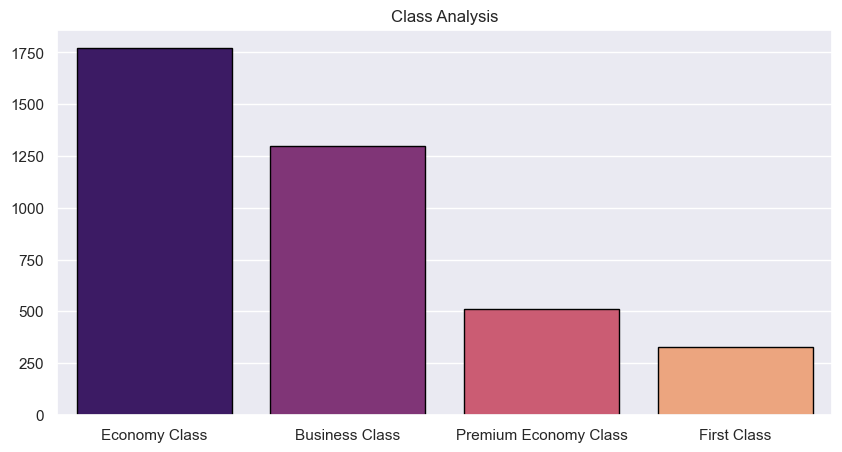

In [86]:
plt.figure(figsize=(10,5))
plt.title('Class Analysis')
sns.barplot(x=p.index,y=p,palette='magma', edgecolor='black');
plt.savefig('6.png')

In [51]:
arr1=np.arange(0,3400,100)

In [52]:
arr1

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
       3300])

In [53]:
df2['Page']=arr1

In [54]:
df2

,Economy Class,Business Class,Premium Economy Class,First Class,Page
0,61,27,15,2,0
1,53,42,12,2,100
2,49,45,18,4,200
3,47,47,6,1,300
4,60,31,10,4,400
5,62,32,9,3,500
6,56,39,10,2,600
7,62,33,5,12,700
8,54,24,23,16,800
9,50,42,11,7,900


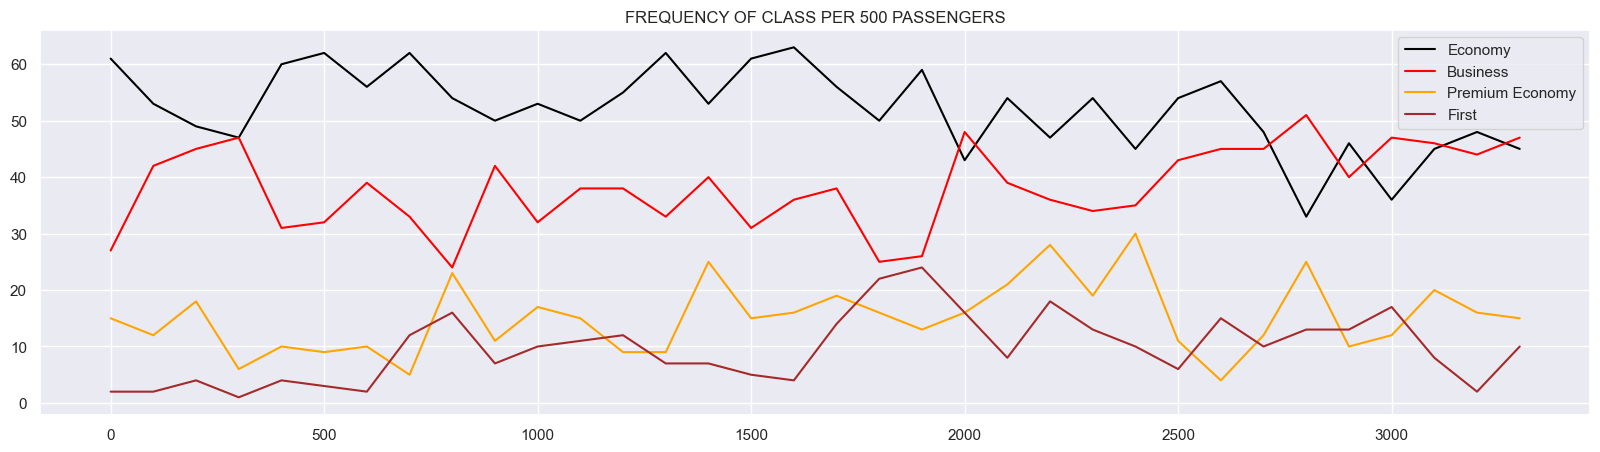

In [89]:
plt.figure(figsize=(20,5))
plt.plot('Page','Economy Class', data=df2, label='Economy',color='black')
plt.plot('Page','Business Class', data=df2, label='Business', color='red')
plt.plot('Page','Premium Economy Class', data=df2, label='Premium Economy',color='orange')
plt.plot('Page','First Class', data=df2, label='First', color='brown')
plt.legend(loc='upper right')
plt.title('FREQUENCY OF CLASS PER 500 PASSENGERS')
plt.savefig('9.png')

In [56]:
df3 = pd.read_excel('C:/Users/asmit/OneDrive/Desktop/python 1/BA_traveller.xlsx')

In [57]:
df3=df3.drop("Unnamed: 0",axis=1)

In [58]:
p1=df3.sum()

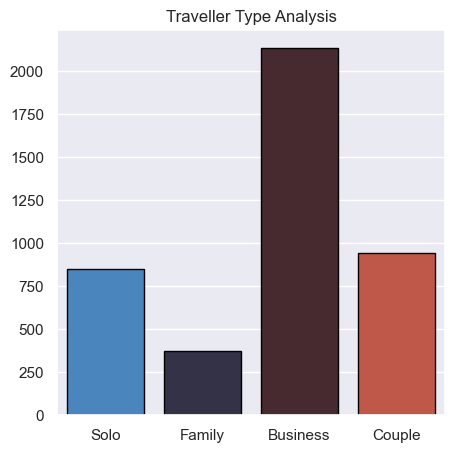

In [87]:
plt.figure(figsize=(5,5))
plt.title('Traveller Type Analysis')
sns.barplot(x=p1.index,y=p1,palette='icefire', edgecolor='black');
plt.savefig('7.png')

In [60]:
df4 = pd.read_excel('C:/Users/asmit/OneDrive/Desktop/python 1/BA_5year.xlsx')

In [61]:
df4=df4.drop("Unnamed: 0",axis=1)

In [62]:
p2=df4.sum()

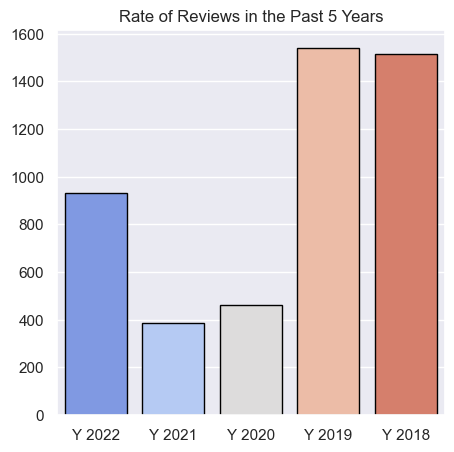

In [88]:
plt.figure(figsize=(5,5))
plt.title('Rate of Reviews in the Past 5 Years')
sns.barplot(x=p2.index,y=p2,palette='coolwarm', edgecolor='black');
plt.savefig('8.png')

In [180]:
from wordcloud import WordCloud

In [181]:
import PIL.Image

In [182]:
for i in range(0,len(df)):
    stringr=stringr+str(df['Review'].iloc[i])

In [183]:
import nltk
from nltk.corpus import stopwords

In [184]:
stopwords = set(stopwords.words('english'))
stopwords.update(["passenger","economy","business","however","due","ba","flight", "british","airway","airways","airline","plane", "told","also","passenger",
                 "london", "heathrow", "aircraft", "could","even", "would"])

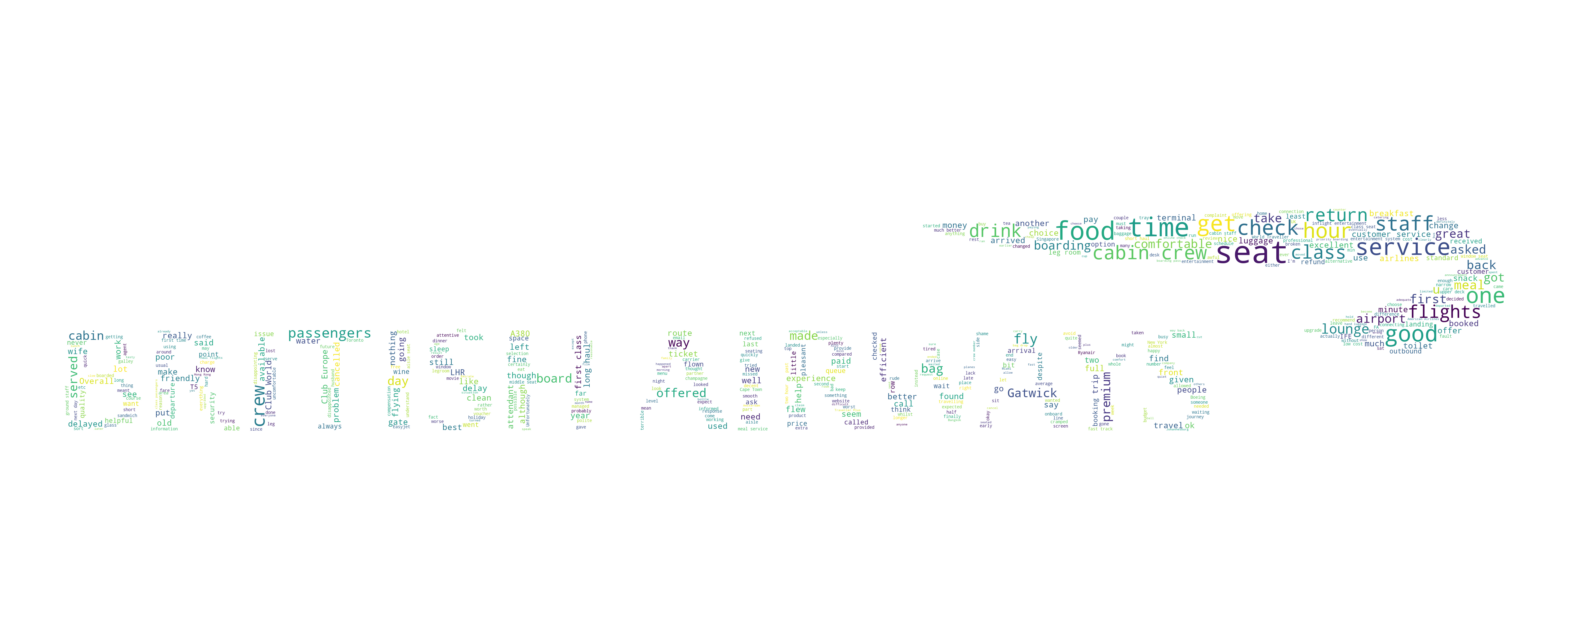

In [185]:
python_mask=np.array(PIL.Image.open("logo.jpg"))
plt.figure(figsize=(20,10))
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords,mask=python_mask,background_color="white").generate(stringr)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

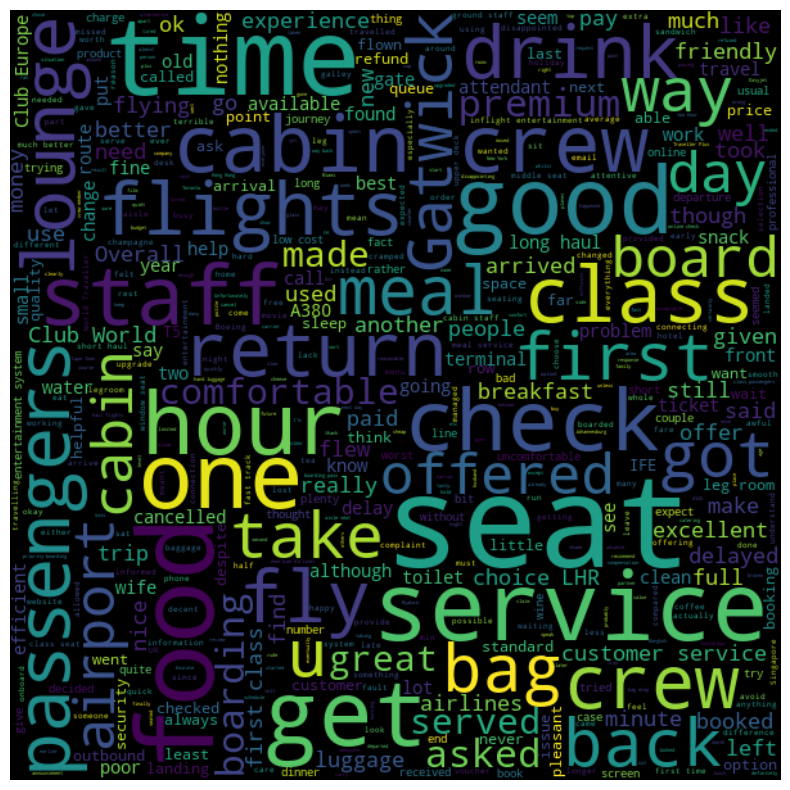

<Figure size 1500x1500 with 0 Axes>

In [186]:

plt.figure(figsize=(20,10))
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(stringr)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('10.png')

In [329]:
df['Review']

1620     London Heathrow - New York JFK, BA115, First ...
632     Mumbai to London Heathrow. I wish to highly co...
1285     Flew Manchester, UK to Billund, Denmark. Have...
1450     Having read so many negative reviews on this ...
2346    LHR – LAX Club World A380 return a week later ...
                              ...                        
2659      On our recommendation my son and his young f...
466       This review is for BA booking system not a f...
2663      Our Good Friday flight was delayed by 5hours...
1176     British Airways is quickly becoming a low qua...
410     My original flight was cancelled just over 2 w...
Name: Review, Length: 3395, dtype: object

In [455]:
reviews1 = df[df['Rating'] == 1]['Review']

In [456]:
reviews1 =reviews1.to_string()

In [467]:
type(reviews1)

str

In [468]:
ratings = [2, 3, 4, 5]
reviews2 = df[df['Rating'].isin(ratings)]['Review']


In [469]:
reviews2 =reviews2.to_string()

In [470]:
type(reviews2)

str

In [459]:
ratings1 = [6, 7, 8, 9]
reviews3 = df[df['Rating'].isin(ratings1)]['Review']

In [460]:
reviews3 =reviews3.to_string()

In [461]:
reviews4 = df[df['Rating'] == 10]['Review']

In [462]:
reviews4 =reviews4.to_string()

In [463]:
type(reviews4)

str

In [446]:
df_country_rating = pd.DataFrame(df.groupby('Country')['Rating'].mean().sort_values(ascending=False)).reset_index().rename(columns={'Rating': 'Average Rating'})

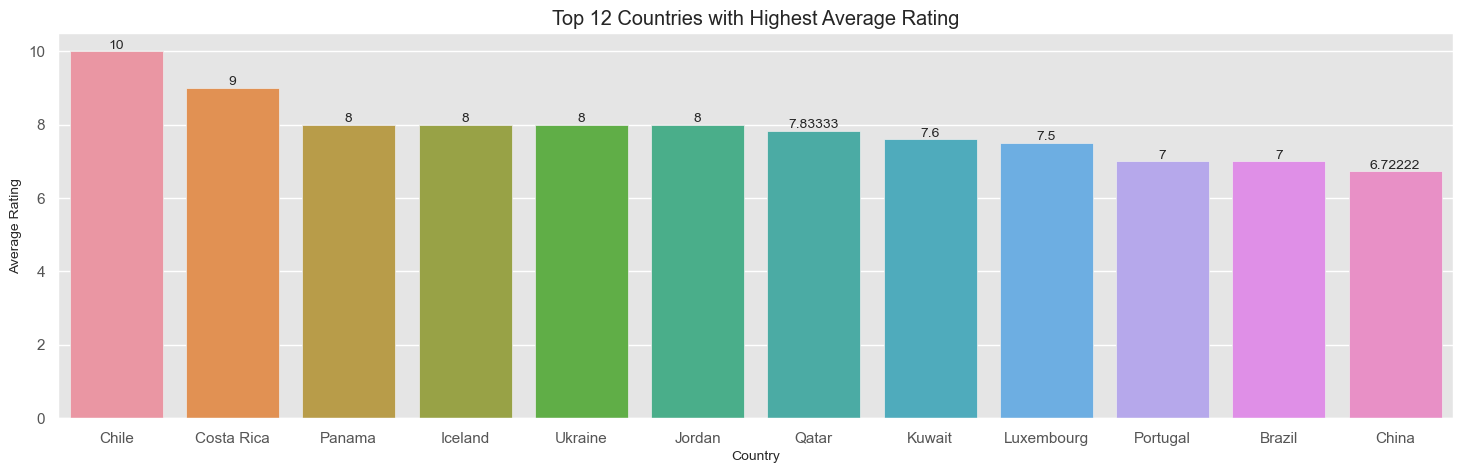

In [447]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='Country', y='Average Rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with Highest Average Rating")
plt.savefig('11.png')

In [448]:
df_country_recommendation = df[df['Recommendation'] == 'yes'].groupby('Country').size().reset_index(name='Max Recommendation')
df_country_recommendation = df_country_recommendation.sort_values('Max Recommendation', ascending=False)


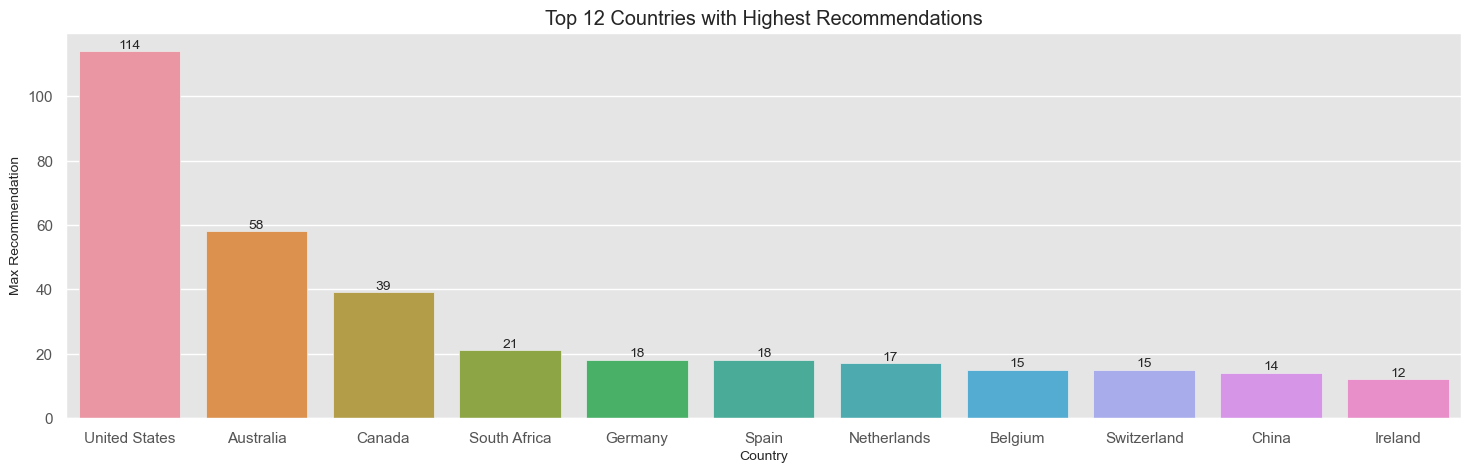

In [449]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='Country', y='Max Recommendation', data=df_country_recommendation[1:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with Highest Recommendations")
plt.savefig('12.png')

In [614]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams
from nltk import ngrams
from nltk.probability import FreqDist

In [615]:
type(z)

numpy.ndarray

In [616]:
my_set=set(z)

In [617]:
stopwords.update(my_set)

In [639]:
words = stringr.split(" ")

new_words = [word for word in words if word not in stopwords]

In [640]:
new_words = [word for word in new_words if word != '']

In [641]:
new_words

['My',
 'original',
 'cancelled',
 '2',
 'weeks',
 'actual',
 'although',
 'alternative',
 'flights',
 'available,',
 'affected',
 'trip',
 'I',
 'planned.',
 'It',
 'feels',
 'like',
 'BA',
 'favour',
 'passengers',
 'rather',
 'paid',
 'deliver',
 'service.',
 '-',
 'JFK,',
 'BA115,',
 'First',
 'seat',
 '1K.',
 'It',
 'strange',
 'bussed',
 'rather',
 'using',
 'airbridge,',
 'capacity',
 'issues.',
 'I',
 'greeted',
 'steps',
 'aircraft,',
 'taken',
 'seat,',
 'handed',
 'pyjamas',
 'wash',
 'bag',
 'glass',
 'champagne.',
 'The',
 'seat',
 'new',
 'First',
 'upgraded',
 'Panasonic',
 'entertainment',
 'system,',
 'I',
 'addressed',
 'name',
 'throughout',
 'flight,',
 'given',
 'extra',
 'food',
 'try',
 'half',
 'full',
 'cabin,',
 'regular',
 'top',
 'ups',
 'drinks,',
 'received',
 'stellar',
 'service',
 'dedicated',
 'professional',
 'crew.',
 'The',
 'new',
 'entertainment',
 'system',
 'great',
 'buy',
 'fly',
 'service',
 'worked',
 'items',
 'delivered',
 'seat.',
 'One',

<Axes: >

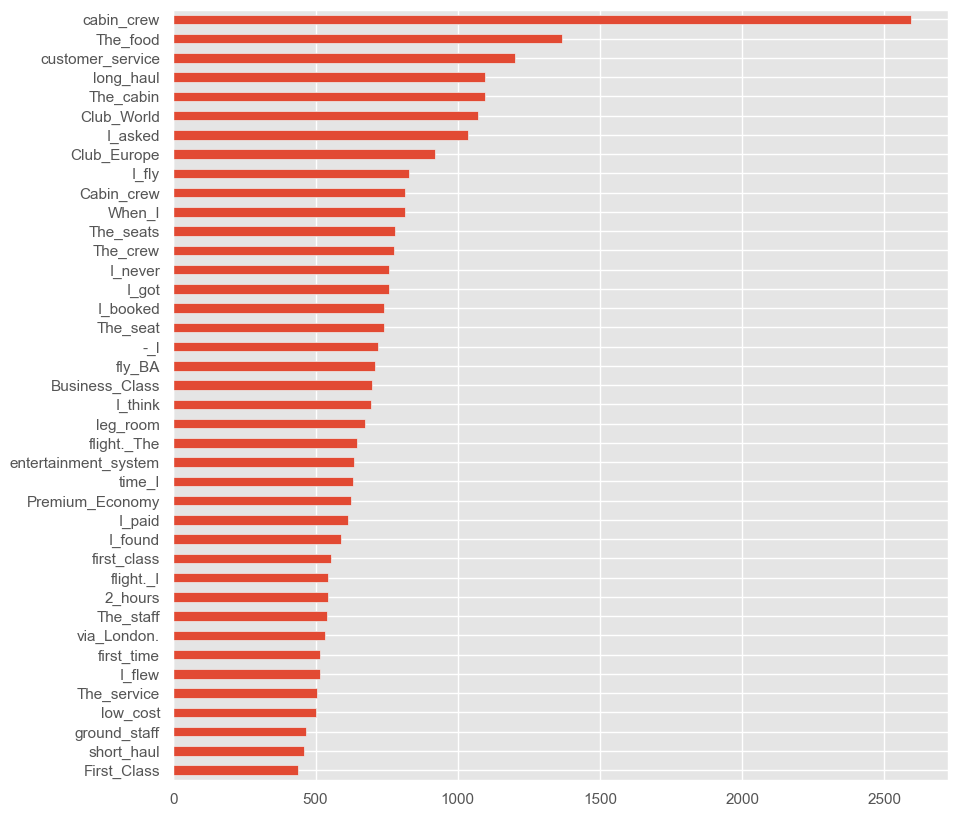

In [642]:
def get_freq_dist(new_words, number_of_ngrams):
    # Generate n-grams
    ngrams_list = list(ngrams(new_words, number_of_ngrams))

    # Creating FreqDist
    ngram_fd = FreqDist(ngrams_list).most_common(40)

    # Sort values by highest frequency
    ngram_sorted = {k: v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Join n-gram tokens with '_' and maintain sorting
    ngram_joined = {'_'.join(k): v for k, v in sorted(ngram_fd, key=lambda item: item[1])}

    # Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    
    # Plot the frequency distribution
    plt.figure(figsize=(10, 10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax

get_freq_dist(new_words,2)

In [643]:
star1 = reviews1.split(" ")
reviews5=reviews2+reviews3
star2 = reviews2.split(" ")
star3 = reviews3.split(" ")
star4 = reviews4.split(" ")
star5 = reviews5.split(" ")

<Axes: >

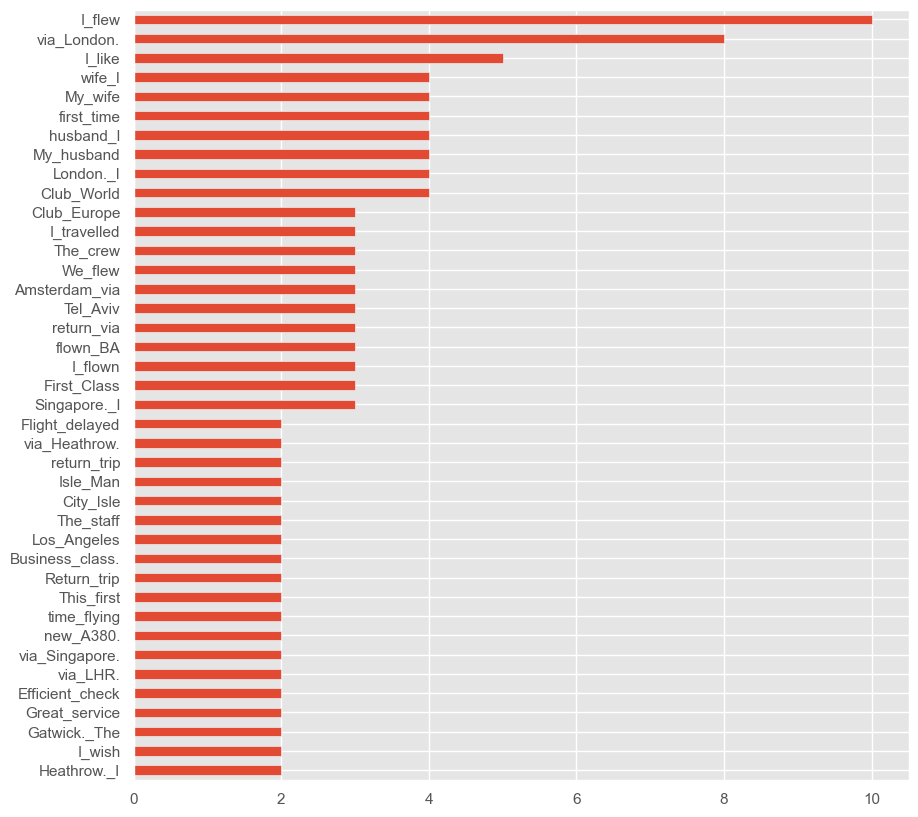

In [647]:
new_words = [word for word in star4 if word not in stopwords]
new_words = [word for word in new_words if word != '']
get_freq_dist(new_words,2)

In [658]:
new_words1 = [word for word in star3 if word not in stopwords]

<Axes: >

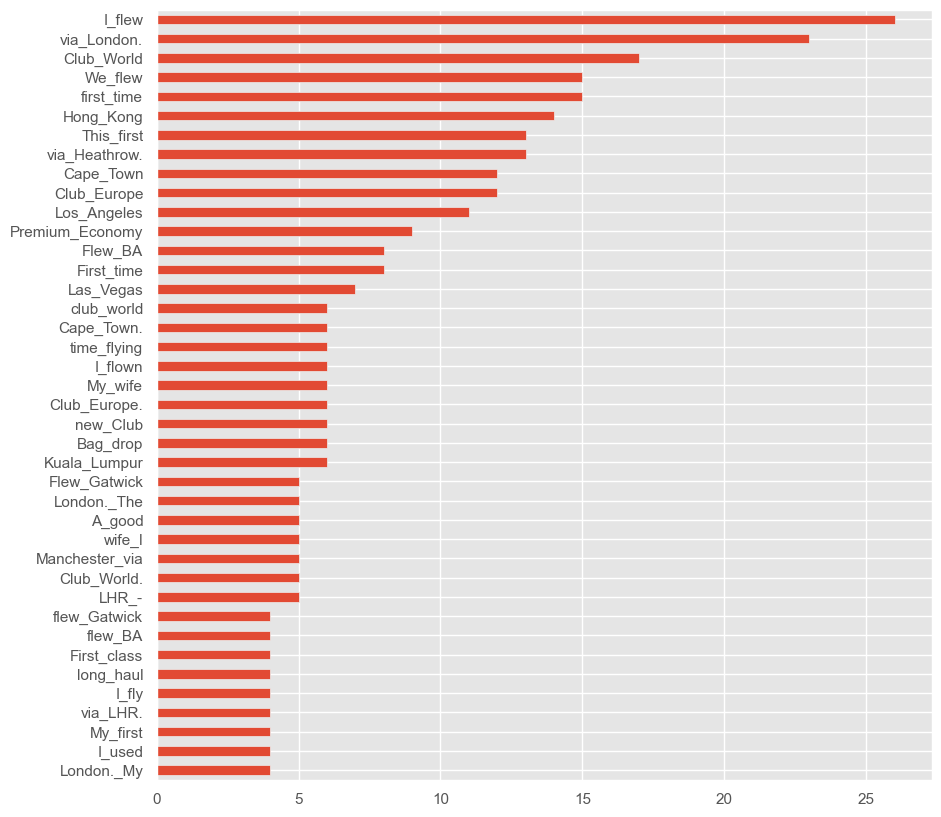

In [659]:
new_words1 = [word for word in new_words1 if word != '']
get_freq_dist(new_words1,2)

<Axes: >

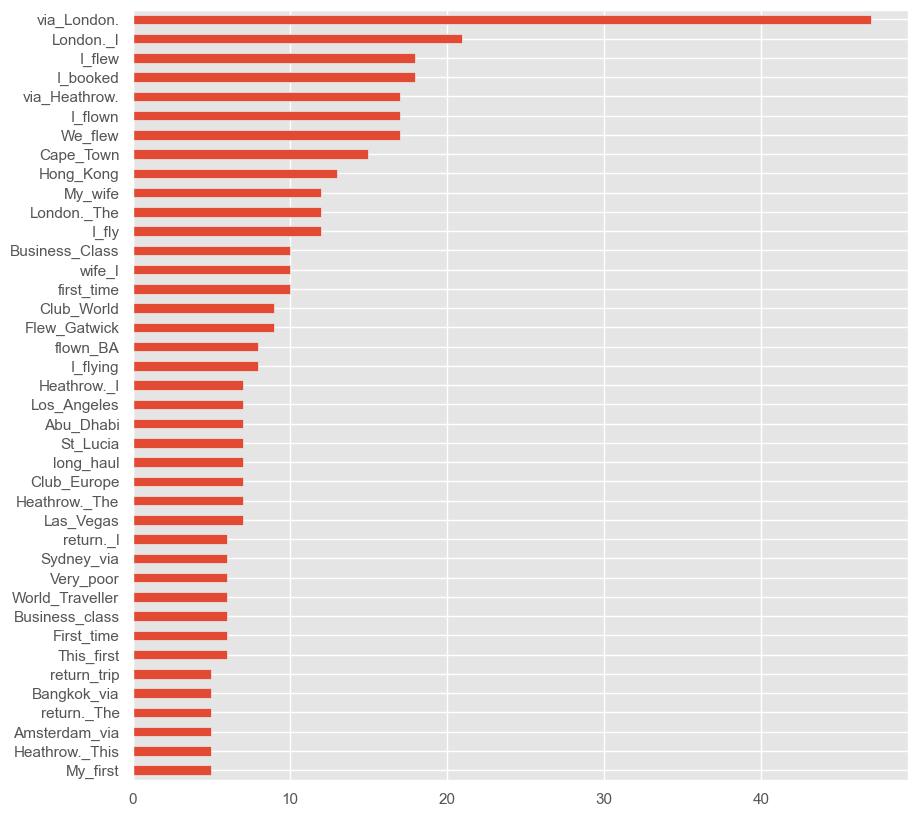

In [655]:
new_words2 = [word for word in star2 if word not in stopwords]
new_words2 = [word for word in new_words2 if word != '']
get_freq_dist(new_words2,2)

<Axes: >

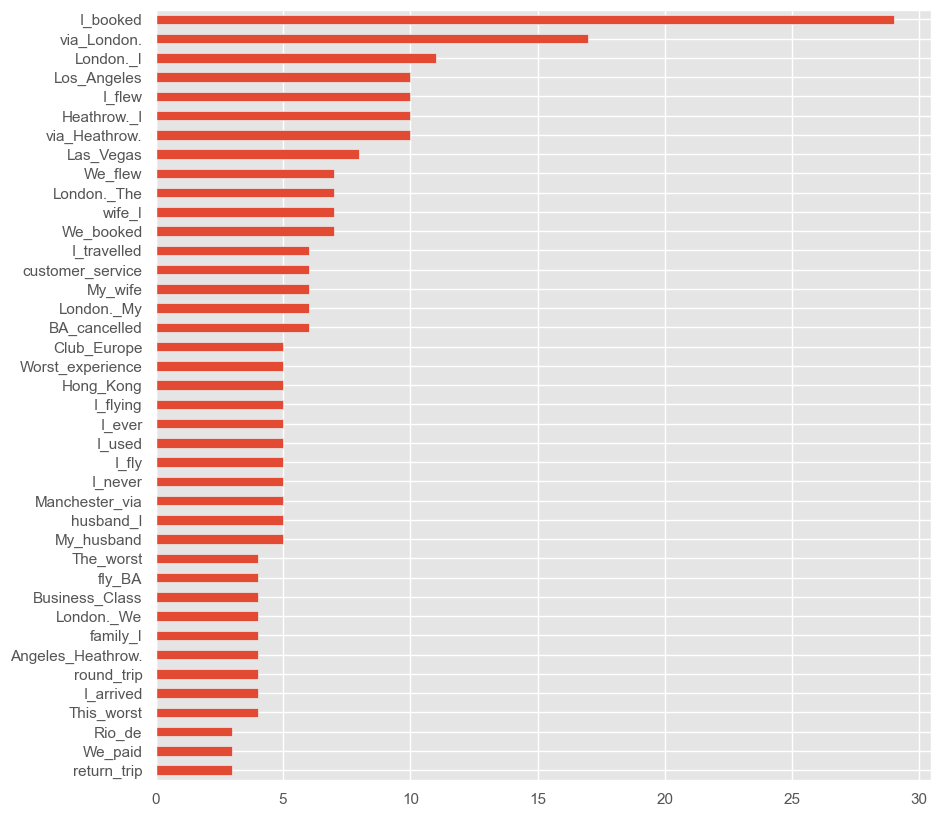

In [657]:
new_words4 = [word for word in star1 if word not in stopwords]
new_words4 = [word for word in new_words4 if word != '']
get_freq_dist(new_words4,2)

In [ ]:
#pipelining

In [337]:
#from transformers import pipeline

#model_name = "bert-base-uncased"
#model_revision = None


#pipeline_name = "sentiment-analysis"
#sentiment_analysis = pipeline(pipeline_name, model=model_name, revision=model_revision,tokenizer=model_name, max_length=512, truncation=True)


In [338]:
#reviews = df['Review']

#results = sentiment_analysis(reviews)
#for i, result in enumerate(results):
    #sentiment = result["label"]
    #score = result["score"]
    #print(f"Review {i+1}: Sentiment: {sentiment}, Score: {score}")


In [339]:
#d=[]
#p=""
#n=""

In [340]:
#for j in range(0,3400):
    #d=d+sent_pipeline(str(df['Review'].iloc[j]))

In [341]:
#print(type(d))

In [342]:
#posrev=[]
#negrev=[]
#p=""
#n=""

In [343]:
#for i in range(0,100):
    #if('POSITIVE' in str(d[i])):
        #negrev.append(d[i])
        #p=p+str(df['Review'].iloc[i])
    #elif('NEGATIVE' in str(d[i])):
        #negrev.append(d[i])
        #n=n+str(df['Review'].iloc[i])

In [344]:
# ROBERTA SCORES

In [345]:
#from transformers import AutoTokenizer

#from transformers import AutoModelForSequenceClassification


In [346]:
#MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
#tokenizer = AutoTokenizer.from_pretrained(MODEL)
#model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [347]:
#import nltk
#from scipy.special import softmax

In [348]:
#plt.style.use('ggplot')

In [354]:
#revs=[]
#pos=[]
#neg=[]
#neu=[]
#score=[]
#neurev=""
#negrev=""
#posrev=""

In [355]:
##for i in range(0,3400):
    #encoded_text = tokenizer(str(df['Review'].iloc[i]), return_tensors='pt',truncation=True,max_length=100)
    #output = model(**encoded_text)
    #scores = output[0][0].detach().numpy()
    #scores = softmax(scores)
    #scores_dict = {
        #'roberta_neg' : scores[0],
        #'roberta_neu' : scores[1],
        #'roberta_pos' : scores[2]
    #}
    #revs.append(str(df['Review'].iloc[i]))
    #pos.append(scores[2])
    #neg.append(scores[0])
    #neu.append(scores[1])
    #if (scores[0] >= scores[1]) and (scores[0] >= scores[2]):
        #largest = 0
        #negrev=negrev+str(df['Review'].iloc[i])
 
    #elif (scores[1] >= scores[0]) and (scores[1] >= scores[2]):
        #largest = 1
        #neurev=neurev+str(df['Review'].iloc[i])
    #else:
        #largest = 2
        #posrev=posrev+str(df['Review'].iloc[i])
    #score.append(largest)


In [ ]:
# batch_size = 32  # Define the batch size for processing

#for i in range(0, 3400, batch_size):
    #batch_reviews = df['Review'].iloc[i:i+batch_size].tolist()  # Extract a batch of reviews
    
    #encoded_batch = tokenizer(batch_reviews, return_tensors='pt', truncation=True, max_length=100, padding=True)
    #output = model(**encoded_batch)
    #scores = output[0].detach().numpy()
    #scores = softmax(scores, axis=1)
    
    #for j in range(len(batch_reviews)):
        #revs.append(str(df['Review'].iloc[i + j]))
        #pos.append(scores[j][2])
        #neg.append(scores[j][0])
        #neu.append(scores[j][1])
        
        #largest = np.argmax(scores[j])
        #score.append(largest)
        
        #if largest == 0:
            #negrev += str(df['Review'].iloc[i + j])
        #elif largest == 1:
            #neurev += str(df['Review'].iloc[i + j])
        #else:
            #posrev += str(df['Review'].iloc[i + j])


In [ ]:
#dict = {'Review': revs, 'Positive': pos, 'Negative': neg,'Neutral':neu,'Scores':score}

In [ ]:
#df5 = pd.DataFrame(dict)

In [ ]:
#df5

In [ ]:
#r=df5['Scores'].value_counts()

In [318]:

#plt.close()
#plt.figure(figsize=(10,5))
#plt.title('POSITIVE, NEGATIVE AND NEUTRAL REVIEWS')
#mylabels = ['Positive','Neutral','Negative']
#c = ['#FFC300','#C70039','#38140c']
#explode = (0.1, 0,0#)

#plt.pie(df5['Scores'].value_counts(),labels=mylabels,colors=c,shadow=True,explode=explode,autopct='%.1f%%')